In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv(r'D:\internship\Project\New\cleaned_data.csv')
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance_km,trip_duration(min),avg_speed_kmh,precip_range
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,14-03-2016,14-03-2016,...,51,40,45.5,0.29,0.0,0,1.498521,7.58,11.861642,0–0.5
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,12-06-2016,12-06-2016,...,83,62,72.5,0.00,0.0,0,1.805507,11.05,9.803659,0–0.5
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,19-01-2016,19-01-2016,...,28,16,22.0,0.00,0.0,T,6.385098,35.40,10.822201,0–0.5
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,06-04-2016,06-04-2016,...,48,30,39.0,0.00,0.0,0,1.485498,7.15,12.465721,0–0.5
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,26-03-2016,26-03-2016,...,55,38,46.5,0.00,0.0,0,1.188588,7.25,9.836594,0–0.5


In [23]:
df.drop(columns=['precip_range'],inplace=True)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,dropoff_time,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance_km,trip_duration(min),avg_speed_kmh
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,14-03-2016,14-03-2016,...,17:32:30,51,40,45.5,0.29,0.0,0,1.498521,7.58,11.861642
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,12-06-2016,12-06-2016,...,00:54:38,83,62,72.5,0.00,0.0,0,1.805507,11.05,9.803659
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,19-01-2016,19-01-2016,...,12:10:48,28,16,22.0,0.00,0.0,T,6.385098,35.40,10.822201
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,06-04-2016,06-04-2016,...,19:39:40,48,30,39.0,0.00,0.0,0,1.485498,7.15,12.465721
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,26-03-2016,26-03-2016,...,13:38:10,55,38,46.5,0.00,0.0,0,1.188588,7.25,9.836594


In [67]:
df['precipitation'] = df['precipitation'].fillna(0)
df.isnull().sum()

id                          0
vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
pickup_date                 0
dropoff_date                0
pickup_time                 0
dropoff_time                0
maximum temperature         0
minimum temperature         0
average temperature         0
precipitation               0
snow fall                   0
snow depth                  0
distance_km                 0
trip_duration(min)          0
avg_speed_kmh               0
pickup_day_of_week          0
pickup_day                  0
pickup_month                0
dropoff_day                 0
dropoff_month               0
pickup_day_of_week_num      0
pickup_hour                 0
pickup_minute               0
dropoff_hour                0
dropoff_minute              0
congestion_level            0
congestion_level_numeric    0
is_weekend

In [24]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_day_of_week'] = df['pickup_date'].dt.day_name()

C:\Users\hlakr\AppData\Local\Temp\ipykernel_11960\2120183485.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['pickup_date'] = pd.to_datetime(df['pickup_date'])


In [25]:
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['pickup_day'] = df['pickup_date'].dt.day

# Extract month number
df['pickup_month'] = df['pickup_date'].dt.month

df['dropoff_day'] = df['dropoff_date'].dt.day

# Extract month number
df['dropoff_month'] = df['dropoff_date'].dt.month


C:\Users\hlakr\AppData\Local\Temp\ipykernel_11960\2187297414.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])


In [27]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['pickup_day_of_week_num'] =df['pickup_day_of_week'].map(day_mapping)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,snow depth,distance_km,trip_duration(min),avg_speed_kmh,pickup_day_of_week,pickup_day,pickup_month,dropoff_day,dropoff_month,pickup_day_of_week_num
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2016-03-14,2016-03-14,...,0,1.498521,7.58,11.861642,Monday,14,3,14,3,1
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2016-06-12,2016-06-12,...,0,1.805507,11.05,9.803659,Sunday,12,6,12,6,7
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2016-01-19,2016-01-19,...,T,6.385098,35.40,10.822201,Tuesday,19,1,19,1,2
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2016-04-06,2016-04-06,...,0,1.485498,7.15,12.465721,Wednesday,6,4,6,4,3
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,2016-03-26,2016-03-26,...,0,1.188588,7.25,9.836594,Saturday,26,3,26,3,6


In [29]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], errors='coerce')

df['pickup_hour'] = df['pickup_time'].apply(lambda t: t.hour)
df['pickup_minute'] = df['pickup_time'].apply(lambda t: t.minute)

df['dropoff_hour'] = df['dropoff_time'].apply(lambda t: t.hour)
df['dropoff_minute'] = df['dropoff_time'].apply(lambda t: t.minute)

C:\Users\hlakr\AppData\Local\Temp\ipykernel_11960\1165593024.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')
C:\Users\hlakr\AppData\Local\Temp\ipykernel_11960\1165593024.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], errors='coerce')


In [30]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,pickup_day_of_week,pickup_day,pickup_month,dropoff_day,dropoff_month,pickup_day_of_week_num,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2016-03-14,2016-03-14,...,Monday,14,3,14,3,1,17,24,17,32
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2016-06-12,2016-06-12,...,Sunday,12,6,12,6,7,0,43,0,54
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2016-01-19,2016-01-19,...,Tuesday,19,1,19,1,2,11,35,12,10
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2016-04-06,2016-04-06,...,Wednesday,6,4,6,4,3,19,32,19,39
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,2016-03-26,2016-03-26,...,Saturday,26,3,26,3,6,13,30,13,38


In [32]:
df['trip_duration(min)'] = df['trip_duration(min)'].round(2)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,pickup_day_of_week,pickup_day,pickup_month,dropoff_day,dropoff_month,pickup_day_of_week_num,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2016-03-14,2016-03-14,...,Monday,14,3,14,3,1,17,24,17,32
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2016-06-12,2016-06-12,...,Sunday,12,6,12,6,7,0,43,0,54
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2016-01-19,2016-01-19,...,Tuesday,19,1,19,1,2,11,35,12,10
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2016-04-06,2016-04-06,...,Wednesday,6,4,6,4,3,19,32,19,39
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,2016-03-26,2016-03-26,...,Saturday,26,3,26,3,6,13,30,13,38


In [35]:
df.columns


Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_date', 'dropoff_date', 'pickup_time',
       'dropoff_time', 'maximum temperature', 'minimum temperature',
       'average temperature', 'precipitation', 'snow fall', 'snow depth',
       'distance_km', 'trip_duration(min)', 'avg_speed_kmh',
       'pickup_day_of_week', 'pickup_day', 'pickup_month', 'dropoff_day',
       'dropoff_month', 'pickup_day_of_week_num', 'pickup_hour',
       'pickup_minute', 'dropoff_hour', 'dropoff_minute'],
      dtype='object')

In [37]:
def categorize_congestion(speed):
    if speed > 20:
        return 'Low'
    elif speed > 10:
        return 'Medium'
    else:
        return 'High'

df['congestion_level'] = df['avg_speed_kmh'].apply(categorize_congestion)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,pickup_day,pickup_month,dropoff_day,dropoff_month,pickup_day_of_week_num,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute,congestion_level
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2016-03-14,2016-03-14,...,14,3,14,3,1,17,24,17,32,Medium
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2016-06-12,2016-06-12,...,12,6,12,6,7,0,43,0,54,High
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2016-01-19,2016-01-19,...,19,1,19,1,2,11,35,12,10,Medium
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2016-04-06,2016-04-06,...,6,4,6,4,3,19,32,19,39,Medium
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,2016-03-26,2016-03-26,...,26,3,26,3,6,13,30,13,38,High


In [38]:
df['congestion_level'] = df['congestion_level'].str.strip().str.lower()
mapping = {'low': 0, 'medium': 1, 'high': 2}
df['congestion_level_numeric'] = df['congestion_level'].map(mapping)

In [39]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [40]:
trace_columns = ['precipitation', 'snow fall', 'snow depth']

# Replace 'T' with 0.001 and convert to float
for col in trace_columns:
    df[col] = df[col].replace('T', 0.001).astype(float)

In [42]:
df['is_weekend'] = df['pickup_day_of_week_num'].isin([5, 6]).astype(int)
df['is_peak_hour'] = df['pickup_hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)
df.head()


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,dropoff_month,pickup_day_of_week_num,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute,congestion_level,congestion_level_numeric,is_weekend,is_peak_hour
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,2016-03-14,2016-03-14,...,3,1,17,24,17,32,medium,1,0,1
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,2016-06-12,2016-06-12,...,6,7,0,43,0,54,high,2,0,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2016-01-19,2016-01-19,...,1,2,11,35,12,10,medium,1,0,0
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2016-04-06,2016-04-06,...,4,3,19,32,19,39,medium,1,0,1
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2016-03-26,2016-03-26,...,3,6,13,30,13,38,high,2,1,0


In [43]:
# Cluster pickup locations
from sklearn.cluster import KMeans
pickup_coords = df[['pickup_latitude', 'pickup_longitude']]
kmeans_pickup = KMeans(n_clusters=10, random_state=42).fit(pickup_coords)
df['pickup_cluster'] = kmeans_pickup.labels_

In [44]:
# Cluster dropoff locations
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']]
kmeans_dropoff = KMeans(n_clusters=10, random_state=42).fit(dropoff_coords)
df['dropoff_cluster'] = kmeans_dropoff.labels_

In [45]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute,congestion_level,congestion_level_numeric,is_weekend,is_peak_hour,pickup_cluster,dropoff_cluster
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,2016-03-14,2016-03-14,...,17,24,17,32,medium,1,0,1,9,6
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,2016-06-12,2016-06-12,...,0,43,0,54,high,2,0,0,5,7
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2016-01-19,2016-01-19,...,11,35,12,10,medium,1,0,0,4,7
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2016-04-06,2016-04-06,...,19,32,19,39,medium,1,0,1,6,7
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2016-03-26,2016-03-26,...,13,30,13,38,high,2,1,0,9,6


In [47]:
df['rush_hour_intensity'] = df['pickup_hour'].apply(lambda x: 
        3 if x in [8, 9, 17, 18] else 
        2 if x in [7, 10, 16, 19] else 1)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,dropoff_date,...,pickup_minute,dropoff_hour,dropoff_minute,congestion_level,congestion_level_numeric,is_weekend,is_peak_hour,pickup_cluster,dropoff_cluster,rush_hour_intensity
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,2016-03-14,2016-03-14,...,24,17,32,medium,1,0,1,9,6,3
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,2016-06-12,2016-06-12,...,43,0,54,high,2,0,0,5,7,1
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2016-01-19,2016-01-19,...,35,12,10,medium,1,0,0,4,7,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2016-04-06,2016-04-06,...,32,19,39,medium,1,0,1,6,7,2
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2016-03-26,2016-03-26,...,30,13,38,high,2,1,0,9,6,1


In [52]:
drop_columns = ['congestion_level','id','congestion_level_numeric','pickup_day_of_week','avg_speed_kmh','trip_duration(min)',
                'dropoff_day','dropoff_month', 'dropoff_hour','dropoff_minute','distance_km', 'pickup_date','dropoff_date','pickup_time','dropoff_time']

In [69]:
X = df.drop(drop_columns, axis=1)
y = df['congestion_level_numeric']

In [70]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [71]:
X.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'maximum temperature', 'minimum temperature', 'average temperature',
       'precipitation', 'snow fall', 'snow depth', 'pickup_day',
       'pickup_month', 'pickup_day_of_week_num', 'pickup_hour',
       'pickup_minute', 'is_weekend', 'is_peak_hour', 'pickup_cluster',
       'dropoff_cluster', 'rush_hour_intensity'],
      dtype='object')

In [57]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred_xgb = best_model.predict(X_test)

print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score (XGBoost):", accuracy_score(y_test, y_pred_xgb))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\hlakr\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix (XGBoost):
 [[ 15368  25205   1165]
 [  4894 121143  21389]
 [   228  36010  51767]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.75      0.37      0.49     41738
           1       0.66      0.82      0.73    147426
           2       0.70      0.59      0.64     88005

    accuracy                           0.68    277169
   macro avg       0.70      0.59      0.62    277169
weighted avg       0.69      0.68      0.67    277169


Accuracy Score (XGBoost): 0.6792895309359993


In [58]:
from sklearn.metrics import log_loss
y_proba_xgb = best_model.predict_proba(X_test)
xgb_loss = log_loss(y_test, y_proba_xgb )
print("XGBoost Log Loss:", xgb_loss)

XGBoost Log Loss: 0.7135392434121368


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_clf=clf.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#y_pred_clf = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_clf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_clf))

Confusion Matrix:
[[ 18973  22008    757]
 [  6220 121776  19430]
 [   251  31991  55763]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.45      0.56     41738
           1       0.69      0.83      0.75    147426
           2       0.73      0.63      0.68     88005

    accuracy                           0.71    277169
   macro avg       0.72      0.64      0.67    277169
weighted avg       0.71      0.71      0.70    277169


Accuracy Score: 0.7089970379082798


In [61]:
from sklearn.metrics import log_loss
y_proba_clf = clf.predict_proba(X_test)
rf_loss = log_loss(y_test, y_proba_clf)
print("Random Forest Log Loss:", rf_loss)

Random Forest Log Loss: 0.6729683477824147


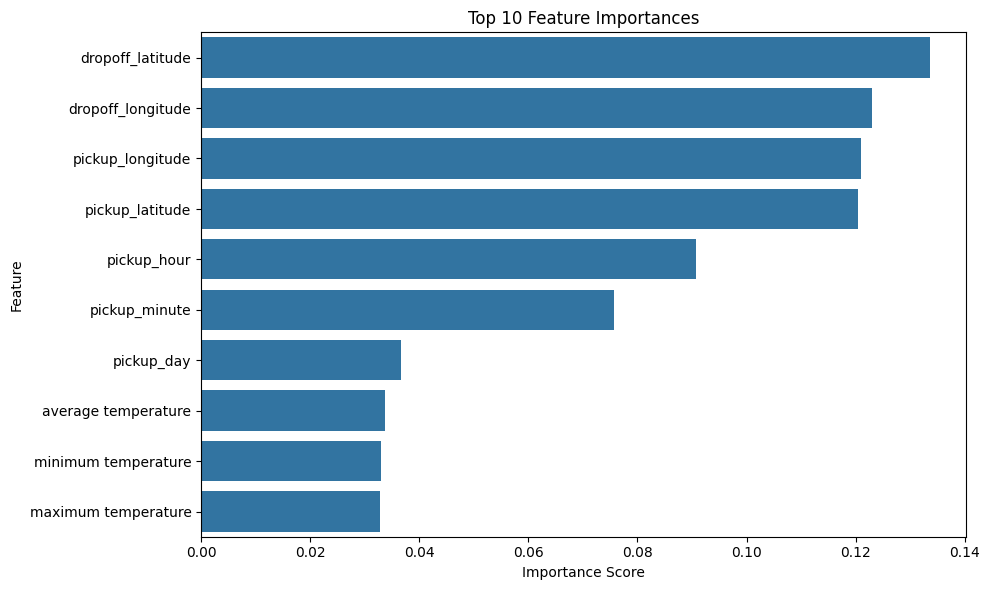

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Log Loss:", log_loss(y_test, y_proba_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.537592587915676
Log Loss: 4.3117939301195864
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.20      0.24     41738
           1       0.58      0.68      0.63    147426
           2       0.52      0.46      0.49     88005

    accuracy                           0.54    277169
   macro avg       0.47      0.45      0.45    277169
weighted avg       0.52      0.54      0.52    277169

Confusion Matrix:
 [[  8163  28515   5060]
 [ 14652 100527  32247]
 [  3735  43956  40314]]


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
y_proba_gbc = gbc.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Log Loss:", log_loss(y_test, y_proba_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))

Accuracy: 0.6521075589261426
Log Loss: 0.7732415669669434
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.29      0.41     41738
           1       0.64      0.83      0.72    147426
           2       0.68      0.52      0.59     88005

    accuracy                           0.65    277169
   macro avg       0.68      0.55      0.58    277169
weighted avg       0.66      0.65      0.63    277169



In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import pandas as pd

# Example model prediction variables (replace with your actual variable names)
models = {
    "Random Forest": {"y_pred": y_pred_clf, "y_proba": y_proba_clf},
    "KNN": {"y_pred": y_pred_knn, "y_proba": y_proba_knn},
    "Gradient Boosting": {"y_pred": y_pred_gbc, "y_proba": y_proba_gbc},
    "XGBoost": {"y_pred": y_pred_xgb, "y_proba": y_proba_xgb},
}

# Initialize results list
results = []

# Compute metrics for each model
for model_name, outputs in models.items():
    y_pred = outputs["y_pred"]
    y_proba = outputs["y_proba"]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    loss = log_loss(y_test, y_proba)

    results.append({
        "Model": model_name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "Log Loss": round(loss, 4)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results_df)

               Model  Accuracy  Precision  Recall  F1-Score  Log Loss
0      Random Forest    0.7090     0.7139  0.7090    0.7019    0.6730
3            XGBoost    0.6793     0.6875  0.6793    0.6677    0.7135
2  Gradient Boosting    0.6521     0.6634  0.6521    0.6334    0.7732
1                KNN    0.5376     0.5203  0.5376    0.5243    4.3118
